In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import keras
import os
from tqdm import tqdm
import json

In [56]:
train_json = r'C:\Users\Dell\agricultural drone\agri_data\weed\train.json'
test_json = r'C:\Users\Dell\agricultural drone\agri_data\weed\test.json'
images_path = '../agricultural drone/agri_data/data/'
print(images_path)

../agricultural drone/agri_data/data/


In [15]:
with open(train_json,'r') as train:
    train_data = json.load(train)
    

In [16]:
with open(test_json,'r') as test:
    test_data = json.load(test)


In [23]:
train_images_list = list(train_data.keys())
test_images_list =list(test_data.keys())
print(test_images_list)

['agri_0_8008.jpeg', 'agri_0_8023.jpeg', 'agri_0_8029.jpeg', 'agri_0_8034.jpeg', 'agri_0_8044.jpeg', 'agri_0_8046.jpeg', 'agri_0_8058.jpeg', 'agri_0_8062.jpeg', 'agri_0_8072.jpeg', 'agri_0_8073.jpeg', 'agri_0_808.jpeg', 'agri_0_8085.jpeg', 'agri_0_8094.jpeg', 'agri_0_8095.jpeg', 'agri_0_81.jpeg', 'agri_0_8104.jpeg', 'agri_0_8105.jpeg', 'agri_0_8107.jpeg', 'agri_0_8108.jpeg', 'agri_0_8121.jpeg', 'agri_0_8126.jpeg', 'agri_0_8140.jpeg', 'agri_0_8141.jpeg', 'agri_0_8143.jpeg', 'agri_0_8146.jpeg', 'agri_0_815.jpeg', 'agri_0_8157.jpeg', 'agri_0_8161.jpeg', 'agri_0_8163.jpeg', 'agri_0_8165.jpeg', 'agri_0_8168.jpeg', 'agri_0_8183.jpeg', 'agri_0_8184.jpeg', 'agri_0_8195.jpeg', 'agri_0_82.jpeg', 'agri_0_8209.jpeg', 'agri_0_8225.jpeg', 'agri_0_823.jpeg', 'agri_0_8246.jpeg', 'agri_0_8252.jpeg', 'agri_0_8262.jpeg', 'agri_0_8265.jpeg', 'agri_0_8267.jpeg', 'agri_0_8269.jpeg', 'agri_0_8297.jpeg', 'agri_0_830.jpeg', 'agri_0_8305.jpeg', 'agri_0_8315.jpeg', 'agri_0_8322.jpeg', 'agri_0_8330.jpeg', 'agri_0

In [18]:
os.mkdir('Train')
os.mkdir('Test')


In [19]:
os.mkdir('Train/weed')
os.mkdir('Train/crop')
os.mkdir('Train/background')

os.mkdir('Test/weed')
os.mkdir('Test/crop')
os.mkdir('Test/background')


In [57]:
#For Training
for count,img_id in tqdm(enumerate(train_images_list)):
    img = cv2.imread(images_path + img_id )

    
    
    for proposal in train_data[img_id]['region_proposal']:
        x,y,w,h = proposal[0]
        label   = proposal[1]
         
        temp_img = cv2.cvtColor(cv2.resize(img[y:y+h,x:x+w,:],(224,224)),cv2.COLOR_BGR2RGB)
        
        cv2.imwrite('Train/'+label+'/'+ label+'_'+ str(len(os.listdir('Train/'+label))) +'.jpeg',temp_img)
        
    
    for background in train_data[img_id]['negative_example']:
        x,y,w,h = background
        
        
        label = 'background'
        
        temp_img = cv2.cvtColor(cv2.resize(img[y:y+h,x:x+w,:],(224,224)),cv2.COLOR_BGR2RGB)
        
        cv2.imwrite('Train/'+label+'/'+ label+'_'+ str(len(os.listdir('Train/'+label))) + '.jpeg',temp_img)

1000it [10:20,  1.61it/s]


In [58]:
for count,img_id in tqdm(enumerate(test_images_list)):
    img = cv2.imread(images_path + img_id)
    
    
    for proposal in test_data[img_id]['region_proposal']:
        x,y,w,h = proposal[0]
        label   = proposal[1]
         
        temp_img = cv2.cvtColor(cv2.resize(img[y:y+h,x:x+w,:],(224,224)),cv2.COLOR_BGR2RGB)
        
        cv2.imwrite('Test/'+label+'/'+ label+'_'+ str(len(os.listdir('Test/'+label))) +'.jpeg',temp_img)
        
    
    for background in test_data[img_id]['negative_example']:
        x,y,w,h = background
        label = 'background'
        
        temp_img = cv2.cvtColor(cv2.resize(img[y:y+h,x:x+w,:],(224,224)),cv2.COLOR_BGR2RGB)
        
        cv2.imwrite('Test/'+label+'/'+ label+'_'+ str(len(os.listdir('Test/'+label))) + '.jpeg',temp_img)

300it [01:32,  3.24it/s]


In [59]:
print('Total training weed images are {}'.format(len(os.listdir('Train/weed'))))
print('Total training crop images are {}'.format(len(os.listdir('Train/crop'))))
print('Total training background images are {}'.format(len(os.listdir('Train/background'))))

Total training weed images are 7721
Total training crop images are 10298
Total training background images are 35350


In [60]:
print('Total testing weed images are {}'.format(len(os.listdir('Test/weed'))))
print('Total testing crop images are {}'.format(len(os.listdir('Test/crop'))))
print('Total testing background images are {}'.format(len(os.listdir('Test/background'))))

Total testing weed images are 2331
Total testing crop images are 3147
Total testing background images are 10769


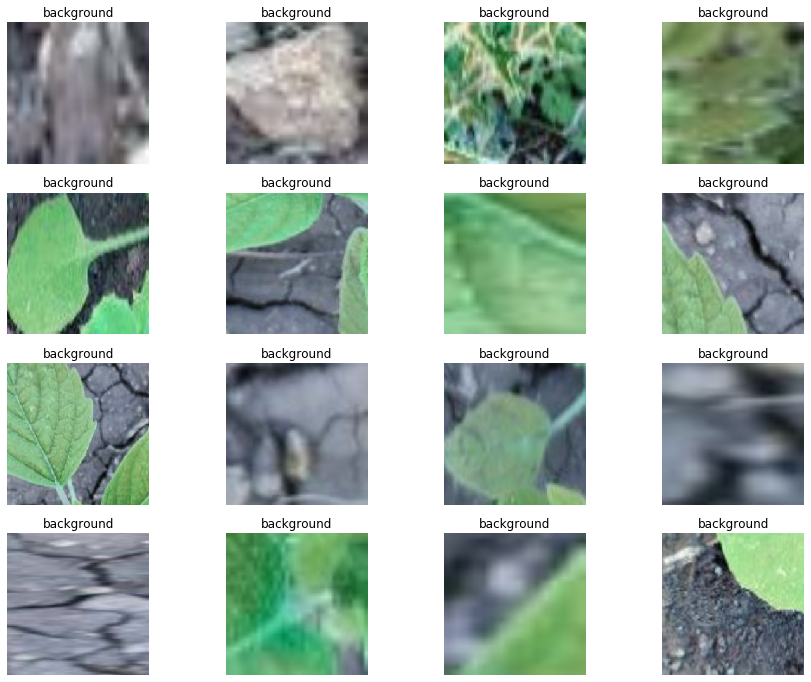

In [61]:
plt.figure(figsize=(15,12))
for i,img in enumerate(os.listdir('Train/background')[:16]):
    plt.subplot(4,4,i+1)
    plt.title('background')
    img = cv2.imread('Train/background/'+img)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')

plt.show() 

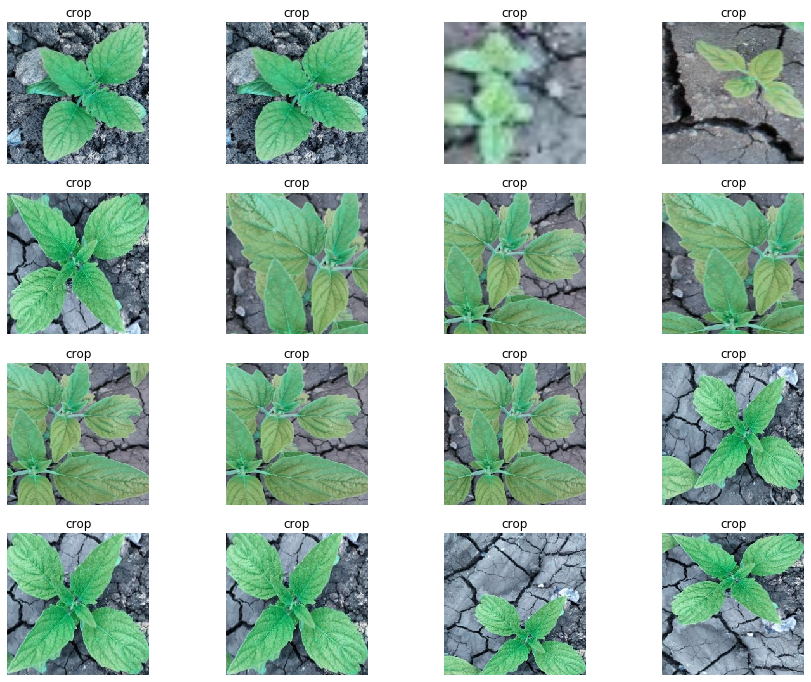

In [62]:
plt.figure(figsize=(15,12))
for i,img in enumerate(os.listdir('Train/crop')[0:16]):
    plt.subplot(4,4,i+1)
    plt.title('crop')
    img = cv2.imread('Train/crop/'+img)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')

plt.show()

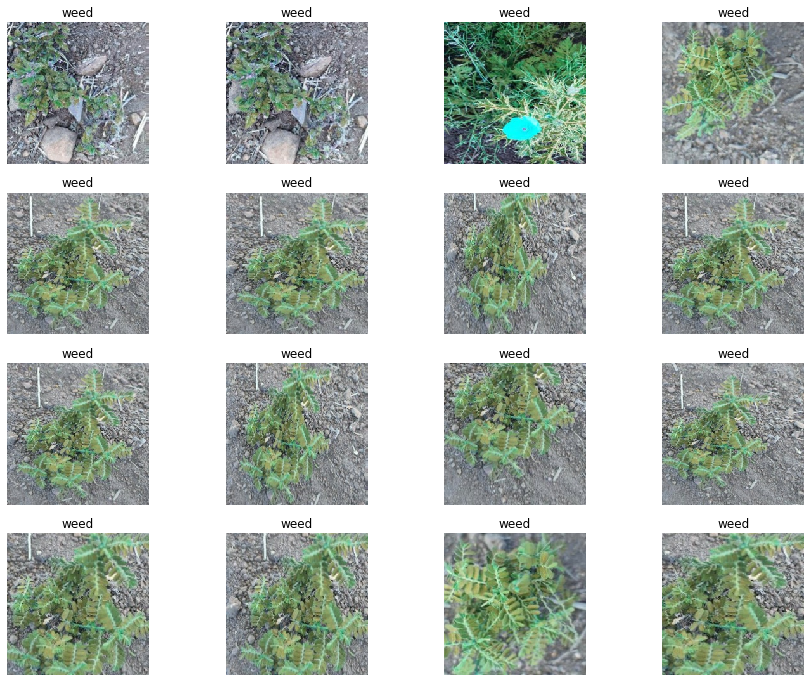

In [64]:
plt.figure(figsize=(15,12))

for i,img in enumerate(os.listdir('Train/weed')[0:16]):
    plt.subplot(4,4,i+1)
    plt.title('weed')
    img = cv2.imread('Train/weed/'+img)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
plt.show()    


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
from tqdm import tqdm
import json
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [73]:
train_path = '../agricultural drone/Train/'
test_path =  '../agricultural drone/Test/'

In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [75]:
BATCH_SIZE = 64
IMAGE_SIZE = (224,224,3)

In [76]:
train_generator = ImageDataGenerator(rescale=1./255,validation_split=0.2)

train_data = train_generator.flow_from_directory(train_path,
                                                 target_size=(224, 224),
                                                 color_mode="rgb",
                                                 class_mode="categorical",
                                                 batch_size=BATCH_SIZE,
                                                 shuffle=True,
                                                 subset='training')

val_data = train_generator.flow_from_directory(train_path,
                                                 target_size=(224, 224),
                                                 color_mode="rgb",
                                                 class_mode="categorical",
                                                 batch_size=BATCH_SIZE,
                                                 shuffle=False,
                                                 subset='validation')

test_generator  = ImageDataGenerator(rescale=1./255)
test_data = test_generator.flow_from_directory(test_path,
                                                 target_size=(224, 224),
                                                 color_mode="rgb",
                                                 class_mode="categorical",shuffle=False,
                                                 batch_size=BATCH_SIZE)

Found 42696 images belonging to 3 classes.
Found 10673 images belonging to 3 classes.
Found 16247 images belonging to 3 classes.


In [77]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense,Flatten,Input,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [78]:
baseModel = VGG16(weights="imagenet", include_top=False,
    input_tensor=Input(shape=IMAGE_SIZE))

headModel = baseModel.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(4096, activation='relu')(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(4096, activation='relu')(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(3, activation='softmax')(headModel)

for layer in baseModel.layers:
    layer.trainable = False

model = Model(inputs=baseModel.input, outputs=headModel)

opt = Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

58892288/58889256 [==============================] - 93s 2us/step


In [79]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [80]:
early_stop = EarlyStopping(patience=2,monitor='val_loss')

In [81]:
results = model.fit_generator(train_data,epochs=5,
                              validation_data=val_data,
                             callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
  3/668 [..............................] - ETA: 1:42:33 - loss: 26.7940 - accuracy: 0.3646

KeyboardInterrupt: 

In [82]:
pd.DataFrame(model.history.history)[['accuracy','val_accuracy']].plot()

KeyError: "None of [Index(['accuracy', 'val_accuracy'], dtype='object')] are in the [columns]"

In [83]:
pd.DataFrame(model.history.history)[['accuracy','val_accuracy']].plot()

KeyError: "None of [Index(['accuracy', 'val_accuracy'], dtype='object')] are in the [columns]"

In [84]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot()

KeyError: "None of [Index(['loss', 'val_loss'], dtype='object')] are in the [columns]"

In [85]:
test_pred = model.predict_generator(test_data)

Instructions for updating:
Please use Model.predict, which supports generators.


KeyboardInterrupt: 

In [ ]:
pred_class = [np.argmax(x) for x in test_pred]

In [ ]:
test_data.class_indices

In [86]:
true_class = test_data.classes

NameError: name 'test_pred' is not defined

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(true_class,pred_class))

In [ ]:
sns.heatmap(confusion_matrix(true_class,pred_class),annot=True)


In [ ]:
mapping_class = test_data.class_indices

In [87]:
mapping_class = dict([(value, key) for key, value in mapping_class.items()]) 

NameError: name 'mapping_class' is not defined

In [ ]:
images, labels = next(iter(test_data))
images = images.reshape(64, 224,224,3)
fig, axes = plt.subplots(4, 4, figsize=(16,16))

for ax, img, label in zip(axes.flat, images[:16], labels[:16]):
    ax.imshow(img)
    true_label = mapping_class[np.argmax(label)]
    
    pred_prob = model.predict(img.reshape(1, 224,224, 3))
    pred_label = mapping_class[np.argmax(pred_prob)]
    
    prob_class = np.max(pred_prob) * 100
    
    ax.set_title(f"TRUE LABEL: {true_label}", fontweight = "bold", fontsize = 12)
    ax.set_xlabel(f"PREDICTED LABEL: {pred_label}\nProb({pred_label}) = {(prob_class):.2f}%",
                 fontweight = "bold", fontsize = 10,
                 color = "blue" if true_label == pred_label else "red")
    
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.tight_layout()
fig.suptitle("PREDICTION for 16 RANDOM TEST IMAGES", size = 30, y = 1.03, fontweight = "bold")
plt.show()

In [ ]:
images, labels = next(iter(test_data))
images = images.reshape(64, 224,224,3)
fig, axes = plt.subplots(4, 4, figsize=(16,16))

for ax, img, label in zip(axes.flat, images[:16], labels[:16]):
    ax.imshow(img)
    true_label = mapping_class[np.argmax(label)]
    
    pred_prob = model.predict(img.reshape(1, 224,224, 3))
    pred_label = mapping_class[np.argmax(pred_prob)]
    
    prob_class = np.max(pred_prob) * 100
    
    ax.set_title(f"TRUE LABEL: {true_label}", fontweight = "bold", fontsize = 12)
    ax.set_xlabel(f"PREDICTED LABEL: {pred_label}\nProb({pred_label}) = {(prob_class):.2f}%",
                 fontweight = "bold", fontsize = 10,
                 color = "blue" if true_label == pred_label else "red")
    
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.tight_layout()
fig.suptitle("PREDICTION for 16 RANDOM TEST IMAGES", size = 30, y = 1.03, fontweight = "bold")
plt.show()

In [ ]:
model.save('RCNN_crop_weed_classification_model.h5')

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
from tqdm import tqdm
import json
import warnings
import seaborn as sns

In [48]:
train_json = r'C:\Users\Dell\agricultural drone\agri_data\weed\train.json'
test_json = r'C:\Users\Dell\agricultural drone\agri_data\weed\test.json'
images_path = '../agricultural drone/agri_data/data/'
model_path  ='../agricultural drone/weed_detection.h5'
label_csv = r'C:\Users\Dell\agricultural drone\pascal_format.csv'
negative_ex_path ='../agricultural drone/Train/background/'


In [31]:
with open(train_json,'r') as train:
    train_region = json.load(train)

In [32]:
with open(test_json,'r') as test:
    test_region = json.load(test)

In [33]:
train_images_list = list(train_region.keys())
test_images_list = list(test_region.keys())

In [34]:
labels = pd.read_csv(label_csv)
labels.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,agri_0_9354.jpeg,512,512,weed,63,120,425,442
1,agri_0_9354.jpeg,512,512,weed,0,1,180,148
2,agri_0_7574.jpeg,512,512,crop,95,167,453,469
3,agri_0_8960.jpeg,512,512,weed,52,76,422,353
4,agri_0_417.jpeg,512,512,weed,7,75,511,411


In [36]:
model = tf.keras.models.load_model(model_path)

In [37]:
model_without_last_2FC = tf.keras.models.Model(model.inputs,model.layers[-5].output)

In [38]:
train_features = []

test_features = []


for index in tqdm(range(len(labels))):
    id = labels.loc[index,'filename']
    img = cv2.imread(images_path + id)
    rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    xmin,ymin,xmax,ymax = int(labels.loc[index,'xmin']) ,int(labels.loc[index,'ymin']),int(labels.loc[index,'xmax']),int(labels.loc[index,'ymax'])

    resized = cv2.resize(rgb_img[ymin:ymax,xmin:xmax,:],(224,224))

    feature_of_img = model_without_last_2FC.predict(resized.reshape(1,224,224,3)/255)
    
    if id in train_images_list:
        
        train_features.append([feature_of_img,labels.loc[index,'class']])
        
    else:
        test_features.append([feature_of_img,labels.loc[index,'class']])


100%|██████████| 2072/2072 [13:24<00:00,  2.58it/s]


In [49]:
for index,img in tqdm(enumerate(os.listdir(negative_ex_path)[:5000])):  #only extracting for 10,000 images
    img = cv2.imread(negative_ex_path +img  )
    img = img.astype('uint8')
    rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    #images already in (224,224,3)
    feature_of_img = model_without_last_2FC.predict(rgb.reshape(1,224,224,3)/255)
    if index<3500:
        train_features.append([feature_of_img,'background'])
    else:
        test_features.append([feature_of_img,'background'])

5000it [36:30,  2.28it/s]


In [50]:
import random
random.shuffle(train_features)
X_train = np.array([x[0] for x in train_features])
X_train = X_train.reshape(-1,4096)
y_train = [x[1] for x in train_features]
y_train = np.array(y_train).reshape(-1,1)
X_test = np.array([x[0] for x in test_features])
X_test = X_test.reshape(-1,4096)
y_test = [x[1] for x in test_features]
y_test = np.array(y_test).reshape(-1,1)

In [77]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import nltk
from nltk.tokenize import word_tokenize
from nltk.classify.scikitlearn import SklearnClassifier


In [79]:
svm_model_linear = SVC(kernel = 'linear', C = 1,probability=True).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  multi_output : boolean (default=False)


In [80]:
accuracy = svm_model_linear.score(X_test, y_test)
accuracy

0.9684754521963824

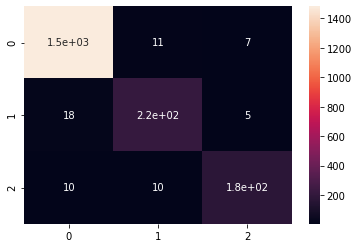

In [85]:

cm = confusion_matrix(y_test, svm_predictions) 
sns.heatmap(cm,annot=True)

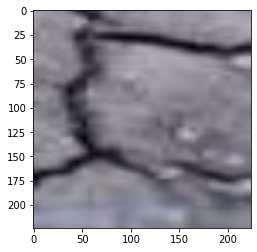

In [86]:
img = cv2.imread(negative_ex_path + os.listdir(negative_ex_path)[45] )
rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

In [89]:
feature_of_img = model_without_last_2FC.predict(rgb.reshape(1,224,224,3)/255)
svm_model_linear.predict(feature_of_img)
svm_model_linear.predict_proba(feature_of_img)
svm_model_linear.classes_

array(['background', 'crop', 'weed'], dtype='<U10')

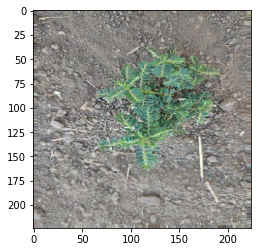

In [90]:
img = cv2.imread(images_path+'agri_0_1024.jpeg')
rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
resized = cv2.resize(rgb,(224,224))
plt.imshow(resized)

In [91]:
svm_model_linear.predict_proba(model_without_last_2FC.predict(resized.reshape(1,224,224,3)/255))

array([[0.0170291 , 0.00945571, 0.97351519]])

In [23]:
import pickle

with open('svm_classifier.pkl','wb') as svm_model:
    pickle.dump(svm_model_linear , svm_model)


NameError: name 'svm_model_linear' is not defined

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
from tqdm import tqdm
import json
import warnings
import pickle

In [31]:
model_path = '../agricultural drone/RCNN_crop_weed_classification_model.h5'
test_img_path = '../agricultural drone/Test'
images_path = '../agricultural drone/agri_data/data/'
svm_model_path = '../agricultural drone/svm_classifier.pkl'
images_name = [x for x in os.listdir(images_path) if x.endswith('.jpeg')]

In [32]:
model = tf.keras.models.load_model(model_path)

In [33]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [34]:
model_without_last_two_fc = tf.keras.models.Model(model.inputs,model.layers[-5].output)


In [35]:
model_without_last_two_fc.summary()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [37]:
with open(svm_model_path,'rb') as svm:
    svm_model = pickle.load(svm)


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator SVC from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [38]:
def iou_calc(bb1 , bb2):
  
    true_xmin, true_ymin, true_width, true_height  = bb1
    bb_xmin, bb_ymin,  bb_width, bb_height = bb2

    true_xmax = true_xmin + true_width
    true_ymax = true_ymin + true_height
    bb_xmax = bb_xmin + bb_width
    bb_ymax = bb_ymin + bb_height

    #calculating area
    true_area = true_width * true_height
    bb_area   = bb_width * bb_height 

    #calculating itersection cordinates
    inter_xmin = max(true_xmin , bb_xmin) 
    inter_ymin = max(true_ymin , bb_ymin)
    inter_xmax = min(true_xmax , bb_xmax)
    inter_ymax = min(true_ymax , bb_ymax)

    if inter_xmax <= inter_xmin or inter_ymax <= inter_ymin:
        iou = 0


    else:
        inter_area = (inter_xmax - inter_xmin) * (inter_ymax - inter_ymin)


        iou = inter_area / (true_area + bb_area - inter_area)
        
    assert iou<=1
    assert iou>=0
    
    return iou

def detection(images_path,confidence=0.9,iou_thresh=0.1):
    
    # appling selective search
    img = plt.imread(images_path)
    cv2.setUseOptimized(True);
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    ss.setBaseImage(img)
    ss.switchToSelectiveSearchFast()
    rects = ss.process()
    sel_rects = rects[:2000]
    
    pred_crop=[]
    pred_weed=[]
    for index, rect in tqdm(enumerate(sel_rects)):

        x,y,w,h = rect
        roi = img[y:y+h,x:x+w,:]
        resized_roi = cv2.resize(roi,(224,224))/255
        
        # Feature extraction
        
        feature = model_without_last_two_fc.predict(resized_roi.reshape(-1,224,224,3))
        
        # SVM prediction
        pred = svm_model.predict_proba(feature.reshape(-1,4096))
        pred_lab=svm_model.predict(feature.reshape(-1,4096))

        if pred_lab == 'crop' and np.max(pred)>confidence:
            pred_crop.append([list(rect),np.max(pred)])
        elif pred_lab=='weed' and np.max(pred)>confidence:
            pred_weed.append([list(rect),np.max(pred)])
            
    final = []
    
    # Detection for crop class
    if len(pred_crop) != 0:
        pred_score_crop = [x[1] for x in pred_crop]
        pred_bb_crop = [x[0] for x in pred_crop]

        for i in range(len(pred_crop)):
            temp_bb , temp_score = pred_bb_crop.copy() , pred_score_crop.copy()
            if len(temp_bb) !=0:

                max_score_box = temp_bb[np.argmax(temp_score)]

                if [max_score_box,np.max(temp_score)] not in final:
                    final.append([max_score_box,np.max(temp_score),'crop'])
                    index_should_del = []

                    for ind,other_bb in enumerate(temp_bb):
                        iou_score = iou_calc(max_score_box , other_bb)
                        
                        # Non maximum suppression(nms)
                        
                        if iou_score >= iou_thresh:
                            index_should_del.append(ind)

                    pred_bb_crop    = []
                    pred_score_crop = []
                    for bb_index ,bb_value in enumerate(temp_bb) :
                        if bb_index not in index_should_del:
                            pred_bb_crop.append(bb_value)

                    for score_index ,score_value in enumerate(temp_score) :
                        if score_index not in index_should_del:
                            pred_score_crop.append(score_value)
                else:
                    continue

            else:
                break

    # Detection for weed class

    if len(pred_weed) != 0:
        pred_score_weed = [x[1] for x in pred_weed]
        pred_bb_weed = [x[0] for x in pred_weed]

        for i in range(len(pred_weed)):
            temp_bb , temp_score = pred_bb_weed.copy() , pred_score_weed.copy()
            if len(temp_bb) !=0:

                max_score_box = temp_bb[np.argmax(temp_score)]

                if [max_score_box,np.max(temp_score)] not in final:
                    final.append([max_score_box,np.max(temp_score),'weed'])
                    index_should_del = []

                    for ind,other_bb in enumerate(temp_bb):
                        iou_score = iou_calc(max_score_box , other_bb)

                        if iou_score >= iou_thresh:
                            index_should_del.append(ind)

                    pred_bb_weed    = []
                    pred_score_weed = []
                    for bb_index ,bb_value in enumerate(temp_bb) :
                        if bb_index not in index_should_del:
                            pred_bb_weed.append(bb_value)

                    for score_index ,score_value in enumerate(temp_score) :
                        if score_index not in index_should_del:
                            pred_score_weed.append(score_value)
                else:
                    continue

            else:
                break
    
   
    imOut = img.copy()
    for rect,score,cls in final:
        
        x,y,w,h = rect
        if cls == 'weed':
            color =(255,0,0)
        if cls == 'crop':
            color = (0,255,0)

        cv2.rectangle(imOut,(x,y),(x+w,y+h),color,2)

        cv2.putText(imOut,cls+':'+str(round(score*100,2)),(x,y-8),cv2.FONT_HERSHEY_SIMPLEX,1, color, 2, cv2.LINE_AA)
    plt.imshow(imOut)
    cv2.imwrite('prediction.jpeg',imOut)
   

    return final 



0it [00:00, ?it/s]
1it [00:00,  4.00it/s]
2it [00:00,  3.95it/s]
3it [00:00,  3.85it/s]
4it [00:01,  3.80it/s]
5it [00:01,  3.82it/s]
6it [00:01,  3.82it/s]
7it [00:01,  3.82it/s]
8it [00:02,  3.74it/s]
9it [00:02,  3.66it/s]
10it [00:02,  3.54it/s]
11it [00:03,  3.42it/s]
12it [00:03,  3.29it/s]
13it [00:03,  3.32it/s]
14it [00:03,  3.35it/s]
15it [00:04,  3.46it/s]
16it [00:04,  3.45it/s]
17it [00:04,  3.42it/s]
18it [00:05,  3.46it/s]
19it [00:05,  3.55it/s]
20it [00:05,  3.62it/s]
21it [00:05,  3.68it/s]
22it [00:06,  3.65it/s]
23it [00:06,  3.69it/s]
24it [00:06,  3.69it/s]
25it [00:06,  3.63it/s]
26it [00:07,  3.63it/s]
27it [00:07,  3.67it/s]
28it [00:07,  3.67it/s]
29it [00:08,  3.63it/s]
30it [00:08,  3.65it/s]
31it [00:08,  3.64it/s]
32it [00:08,  3.66it/s]
33it [00:09,  3.65it/s]
34it [00:09,  3.67it/s]
35it [00:09,  3.67it/s]
36it [00:10,  3.55it/s]
37it [00:10,  3.59it/s]
38it [00:10,  3.56it/s]
39it [00:10,  3.60it/s]
40it [00:11,  3.55it/s]
41it [00:11,  3.59it/s]
42it 

588it [03:14,  2.89it/s]
589it [03:14,  2.82it/s]
590it [03:14,  2.75it/s]
591it [03:15,  2.62it/s]
592it [03:15,  2.46it/s]
593it [03:16,  2.46it/s]
594it [03:16,  2.56it/s]
595it [03:17,  2.59it/s]
596it [03:17,  2.61it/s]
597it [03:17,  2.61it/s]
598it [03:18,  2.66it/s]
599it [03:18,  2.59it/s]
600it [03:18,  2.62it/s]
601it [03:19,  2.69it/s]
602it [03:19,  2.75it/s]
603it [03:19,  2.80it/s]
604it [03:20,  2.80it/s]
605it [03:20,  2.79it/s]
606it [03:21,  2.80it/s]
607it [03:21,  2.70it/s]
608it [03:21,  2.72it/s]
609it [03:22,  2.76it/s]
610it [03:22,  2.80it/s]
611it [03:22,  2.85it/s]
612it [03:23,  2.85it/s]
613it [03:23,  2.83it/s]
614it [03:23,  2.83it/s]
615it [03:24,  2.73it/s]
616it [03:24,  2.74it/s]
617it [03:24,  2.76it/s]
618it [03:25,  2.81it/s]
619it [03:25,  2.85it/s]
620it [03:26,  2.87it/s]
621it [03:26,  2.82it/s]
622it [03:26,  2.80it/s]
623it [03:27,  2.70it/s]
624it [03:27,  2.68it/s]
625it [03:27,  2.75it/s]
626it [03:28,  2.86it/s]
627it [03:28,  2.95it/s]


1166it [07:07,  1.32it/s]
1167it [07:08,  1.31it/s]
1168it [07:09,  1.37it/s]
1169it [07:09,  1.42it/s]
1170it [07:10,  1.41it/s]
1171it [07:11,  1.37it/s]
1172it [07:12,  1.34it/s]
1173it [07:12,  1.32it/s]
1174it [07:13,  1.36it/s]
1175it [07:14,  1.38it/s]
1176it [07:15,  1.38it/s]
1177it [07:15,  1.38it/s]
1178it [07:16,  1.40it/s]
1179it [07:17,  1.41it/s]
1180it [07:17,  1.39it/s]
1181it [07:18,  1.40it/s]
1182it [07:19,  1.45it/s]
1183it [07:19,  1.46it/s]
1184it [07:20,  1.45it/s]
1185it [07:21,  1.44it/s]
1186it [07:21,  1.43it/s]
1187it [07:22,  1.41it/s]
1188it [07:23,  1.39it/s]
1189it [07:24,  1.42it/s]
1190it [07:24,  1.47it/s]
1191it [07:25,  1.50it/s]
1192it [07:26,  1.53it/s]
1193it [07:26,  1.55it/s]
1194it [07:27,  1.57it/s]
1195it [07:27,  1.56it/s]
1196it [07:28,  1.55it/s]
1197it [07:29,  1.57it/s]
1198it [07:29,  1.57it/s]
1199it [07:30,  1.56it/s]
1200it [07:31,  1.55it/s]
1201it [07:31,  1.52it/s]
1202it [07:32,  1.50it/s]
1203it [07:33,  1.49it/s]
1204it [07:3

[[[0, 41, 312, 471], 0.9995940842456748, 'crop'],
 [[304, 0, 208, 459], 0.9964038996893559, 'crop']]

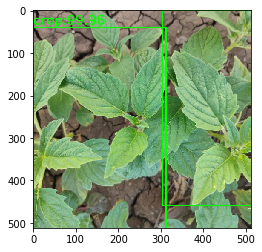

In [99]:
detection(images_path+images_name[500])


0it [00:00, ?it/s]
1it [00:00,  4.12it/s]
2it [00:00,  4.07it/s]
3it [00:00,  4.04it/s]
4it [00:00,  4.08it/s]
5it [00:01,  4.08it/s]
6it [00:01,  4.07it/s]
7it [00:01,  4.06it/s]
8it [00:01,  4.06it/s]
9it [00:02,  4.06it/s]
10it [00:02,  4.05it/s]
11it [00:02,  4.03it/s]
12it [00:02,  4.01it/s]
13it [00:03,  4.02it/s]
14it [00:03,  4.03it/s]
15it [00:03,  3.98it/s]
16it [00:03,  3.99it/s]
17it [00:04,  3.98it/s]
18it [00:04,  3.98it/s]
19it [00:04,  3.92it/s]
20it [00:04,  3.91it/s]
21it [00:05,  3.89it/s]
22it [00:05,  3.92it/s]
23it [00:05,  3.91it/s]
24it [00:06,  3.91it/s]
25it [00:06,  3.92it/s]
26it [00:06,  3.92it/s]
27it [00:06,  3.86it/s]
28it [00:07,  3.90it/s]
29it [00:07,  3.89it/s]
30it [00:07,  3.91it/s]
31it [00:07,  3.85it/s]
32it [00:08,  3.86it/s]
33it [00:08,  3.85it/s]
34it [00:08,  3.80it/s]
35it [00:08,  3.77it/s]
36it [00:09,  3.80it/s]
37it [00:09,  3.75it/s]
38it [00:09,  3.73it/s]
39it [00:09,  3.77it/s]
40it [00:10,  3.72it/s]
41it [00:10,  3.58it/s]
42it 

588it [03:34,  2.68it/s]
589it [03:34,  2.69it/s]
590it [03:35,  2.74it/s]
591it [03:35,  2.81it/s]
592it [03:35,  2.86it/s]
593it [03:36,  2.86it/s]
594it [03:36,  2.88it/s]
595it [03:36,  2.88it/s]
596it [03:37,  2.72it/s]
597it [03:37,  2.71it/s]
598it [03:37,  2.76it/s]
599it [03:38,  2.84it/s]
600it [03:38,  2.88it/s]
601it [03:38,  2.84it/s]
602it [03:39,  2.86it/s]
603it [03:39,  2.86it/s]
604it [03:40,  2.73it/s]
605it [03:40,  2.74it/s]
606it [03:40,  2.85it/s]
607it [03:41,  2.94it/s]
608it [03:41,  3.04it/s]
609it [03:41,  3.12it/s]
610it [03:42,  3.06it/s]
611it [03:42,  3.04it/s]
612it [03:42,  2.98it/s]
613it [03:43,  2.93it/s]
614it [03:43,  2.92it/s]
615it [03:43,  2.85it/s]
616it [03:44,  2.85it/s]
617it [03:44,  2.91it/s]
618it [03:44,  2.93it/s]
619it [03:45,  2.94it/s]
620it [03:45,  2.95it/s]
621it [03:45,  2.82it/s]
622it [03:46,  2.81it/s]
623it [03:46,  2.85it/s]
624it [03:46,  2.89it/s]
625it [03:47,  2.92it/s]
626it [03:47,  2.91it/s]
627it [03:47,  2.88it/s]


1166it [09:05,  1.18it/s]
1167it [09:06,  1.18it/s]
1168it [09:06,  1.23it/s]
1169it [09:07,  1.26it/s]
1170it [09:08,  1.29it/s]
1171it [09:09,  1.32it/s]
1172it [09:09,  1.34it/s]
1173it [09:10,  1.34it/s]
1174it [09:11,  1.35it/s]
1175it [09:12,  1.37it/s]
1176it [09:12,  1.37it/s]
1177it [09:13,  1.37it/s]
1178it [09:14,  1.37it/s]
1179it [09:14,  1.38it/s]
1180it [09:15,  1.37it/s]
1181it [09:16,  1.36it/s]
1182it [09:17,  1.35it/s]
1183it [09:17,  1.34it/s]
1184it [09:18,  1.30it/s]
1185it [09:19,  1.27it/s]
1186it [09:20,  1.25it/s]
1187it [09:21,  1.24it/s]
1188it [09:22,  1.23it/s]
1189it [09:22,  1.26it/s]
1190it [09:23,  1.29it/s]
1191it [09:24,  1.31it/s]
1192it [09:24,  1.34it/s]
1193it [09:25,  1.35it/s]
1194it [09:26,  1.36it/s]
1195it [09:27,  1.37it/s]
1196it [09:27,  1.38it/s]
1197it [09:28,  1.37it/s]
1198it [09:29,  1.37it/s]
1199it [09:30,  1.38it/s]
1200it [09:30,  1.37it/s]
1201it [09:31,  1.36it/s]
1202it [09:32,  1.34it/s]
1203it [09:33,  1.34it/s]
1204it [09:3

1730it [14:18,  3.65it/s]
1731it [14:18,  3.57it/s]
1732it [14:18,  3.60it/s]
1733it [14:18,  3.63it/s]
1734it [14:19,  3.66it/s]
1735it [14:19,  3.65it/s]
1736it [14:19,  3.65it/s]
1737it [14:19,  3.66it/s]
1738it [14:20,  3.65it/s]
1739it [14:20,  3.64it/s]
1740it [14:20,  3.62it/s]
1741it [14:21,  3.62it/s]
1742it [14:21,  3.62it/s]
1743it [14:21,  3.63it/s]
1744it [14:21,  3.54it/s]
1745it [14:22,  3.44it/s]
1746it [14:22,  3.36it/s]
1747it [14:22,  3.34it/s]
1748it [14:23,  3.32it/s]
1749it [14:23,  3.26it/s]
1750it [14:23,  3.25it/s]
1751it [14:24,  3.37it/s]
1752it [14:24,  3.42it/s]
1753it [14:24,  3.48it/s]
1754it [14:24,  3.53it/s]
1755it [14:25,  3.56it/s]
1756it [14:25,  3.55it/s]
1757it [14:25,  3.58it/s]
1758it [14:25,  3.59it/s]
1759it [14:26,  3.57it/s]
1760it [14:26,  3.59it/s]
1761it [14:26,  3.56it/s]
1762it [14:27,  3.58it/s]
1763it [14:27,  3.56it/s]
1764it [14:27,  3.57it/s]
1765it [14:27,  3.58it/s]
1766it [14:28,  3.60it/s]
1767it [14:28,  3.57it/s]
1768it [14:2

[[[287, 345, 25, 24], 0.9358606833754168, 'crop'],
 [[192, 94, 30, 40], 0.9166281461848663, 'crop'],
 [[469, 80, 43, 48], 0.916415581246742, 'crop'],
 [[0, 0, 512, 512], 0.9999984671908416, 'weed'],
 [[173, 302, 138, 130], 0.9909640113157528, 'weed'],
 [[250, 202, 162, 147], 0.984055526440526, 'weed'],
 [[321, 345, 134, 167], 0.9693771947121779, 'weed'],
 [[413, 0, 99, 127], 0.9420182548311875, 'weed']]

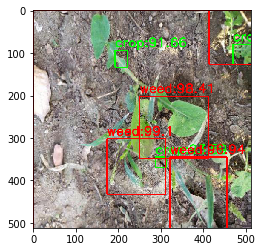

In [100]:
detection(images_path+images_name[1100])

In [ ]:
detection(images_path+images_name[1100])

1941it [10:27,  3.48it/s]